In [1]:
import pandas as pd
import numpy as np
sub = pd.read_csv('spring_2017.csv')

In [2]:
sub['datetime'] = pd.to_datetime(sub['datetime'])

In [3]:
def is_weekday(row):
    if row < 5:
        return 1
    else: 
        return 0
    


In [4]:
sub['weekday'] = sub['datetime'].apply(lambda x: x.weekday())
daily_subway = sub.groupby(['station','linename','weekday'])[['hr4']].sum()/5

daily_subway['daily_traffic'] = daily_subway.hr4
daily_subway = daily_subway.reset_index()
daily_subway['is_weekday'] = daily_subway['weekday'].apply(is_weekday)

In [5]:
daily_subway.head()

,station,linename,weekday,hr4,daily_traffic,is_weekday
0,1 AV,L,0,20338.8,20338.8,1
1,1 AV,L,1,25698.6,25698.6,1
2,1 AV,L,2,27502.4,27502.4,1
3,1 AV,L,3,28319.4,28319.4,1
4,1 AV,L,4,28320.0,28320.0,1


In [6]:
daily_subway['stl'] = daily_subway['station'] + ' ' + daily_subway['linename']
sub['stl'] = sub['station'] + ' ' + sub['linename']

In [7]:
ds2 = daily_subway.groupby(['stl','is_weekday'])[['daily_traffic']].sum().reset_index()

In [8]:
ds2.head()

,stl,is_weekday,daily_traffic
0,1 AV L,0,27680.6
1,1 AV L,1,130179.2
2,103 ST 1,0,18523.0
3,103 ST 1,1,77700.8
4,103 ST 6,0,16955.8


In [9]:
ds2['idx'] = ds2['daily_traffic']/ds2['daily_traffic'].shift(1)
ds2['weekly_traffic'] = ds2['daily_traffic'] + ds2['daily_traffic'].shift(1)

ds3 = ds2[ds2.is_weekday == 1]
ds3 = ds3[['stl','idx','weekly_traffic']].reset_index()
ds3= ds3[['stl','idx','weekly_traffic']]
ds3['scaled_weekday_index'] = ds3['idx']/2.5

ds3['scaled_weekday_index'].replace([np.inf, -np.inf], np.nan,inplace=True)

In [10]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 4 columns):
stl                     476 non-null object
idx                     476 non-null float64
weekly_traffic          476 non-null float64
scaled_weekday_index    476 non-null float64
dtypes: float64(3), object(1)
memory usage: 15.0+ KB


In [11]:
ds3.head()

,stl,idx,weekly_traffic,scaled_weekday_index
0,1 AV L,4.702904,157859.8,1.881162
1,103 ST 1,4.194828,96223.8,1.677931
2,103 ST 6,5.107538,103558.2,2.043015
3,103 ST BC,5.115914,35372.0,2.046366
4,103 ST-CORONA 7,3.853083,155531.6,1.541233


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
ds3.scaled_weekday_index.isnull().sum()

0

In [14]:
ds3['scaled_weekday_index'].nlargest(40)

370    118.901901
463    103.320034
409     99.585149
196     79.365049
279     69.493046
218     32.369191
316     29.761515
385     18.596600
387      8.661637
298      6.858765
352      6.585476
292      5.639665
110      5.153242
327      4.362325
89       4.329642
9        4.298251
284      4.213445
323      4.162329
241      4.153007
145      4.149446
195      4.027341
384      3.827704
5        3.809862
245      3.781281
161      3.698746
159      3.642906
438      3.621966
397      3.493149
354      3.450137
214      3.435871
296      3.434953
132      3.370630
221      3.348673
302      3.346143
233      3.322198
81       3.311092
244      3.307597
303      3.277028
403      3.271548
429      3.249967
Name: scaled_weekday_index, dtype: float64

In [15]:
ds3.iloc[223].stl

'BROADWAY G'

In [16]:
daily_subway[daily_subway['stl'] == ds3.iloc[108].stl]

,station,linename,weekday,hr4,daily_traffic,is_weekday,stl
756,49 ST,NQRW,0,26629.6,26629.6,1,49 ST NQRW
757,49 ST,NQRW,1,30736.8,30736.8,1,49 ST NQRW
758,49 ST,NQRW,2,33673.2,33673.2,1,49 ST NQRW
759,49 ST,NQRW,3,33598.2,33598.2,1,49 ST NQRW
760,49 ST,NQRW,4,32946.2,32946.2,1,49 ST NQRW
761,49 ST,NQRW,5,22406.4,22406.4,0,49 ST NQRW
762,49 ST,NQRW,6,20420.4,20420.4,0,49 ST NQRW


(array([339., 101.,  18.,   9.,   4.,   2.,   1.,   0.,   0.,   2.]),
 array([2.4800000e+01, 1.0356288e+05, 2.0710096e+05, 3.1063904e+05,
        4.1417712e+05, 5.1771520e+05, 6.2125328e+05, 7.2479136e+05,
        8.2832944e+05, 9.3186752e+05, 1.0354056e+06]),
 <a list of 10 Patch objects>)

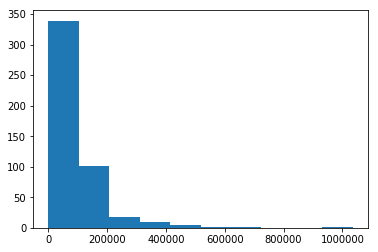

In [17]:
plt.hist(ds3.weekly_traffic)

In [18]:
ds4 = ds3[ds3['weekly_traffic']>100000]

(array([99., 20., 11.,  7.,  2.,  1.,  1.,  0.,  1.,  1.]),
 array([ 100169.8 ,  193693.38,  287216.96,  380740.54,  474264.12,
         567787.7 ,  661311.28,  754834.86,  848358.44,  941882.02,
        1035405.6 ]),
 <a list of 10 Patch objects>)

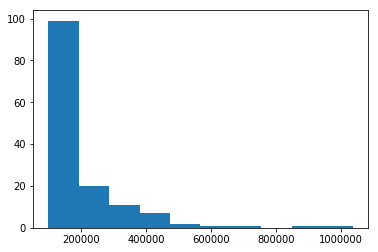

In [19]:
plt.hist(ds4.weekly_traffic)

In [20]:
ds4

,stl,idx,weekly_traffic,scaled_weekday_index
0,1 AV L,4.702904,157859.8,1.881162
2,103 ST 6,5.107538,103558.2,2.043015
4,103 ST-CORONA 7,3.853083,155531.6,1.541233
12,116 ST 6,4.394979,122780.0,1.757991
17,125 ST 23,3.675470,124377.8,1.470188
18,125 ST 456,4.930034,218500.4,1.972014
19,125 ST ACBD,3.624685,229322.4,1.449874
20,135 ST 23,4.013297,116350.6,1.605319
22,137 ST CITY COL 1,5.242994,105810.0,2.097197
24,14 ST 123FLM,2.988487,196003.8,1.195395


In [21]:
loc = pd.read_csv('nyc_subway_locations.csv')

In [22]:
loc.head()

,OBJECTID,NAME,the_geom,LINE
0,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express
1,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express
2,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2
3,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4
4,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4


In [23]:
loc.LINE.value_counts()

2-5                26
L                  24
F                  21
1                  20
A-C                18
J-Z                15
4-6-6 Express      14
A                  14
4                  13
D                  13
G                  12
Q                  12
1-2                12
A-S                12
B-D                11
E-M-R              11
7-7 Express        11
3-4                10
7                  10
2-3                10
N                   9
N-Q-R-W             9
6                   9
6-6 Express         9
A-C-E               8
A-B-C               8
F-G                 8
B-Q                 7
M                   7
J                   7
                   ..
4-5                 5
B-D-F-M             5
N-R                 5
R-W                 5
R                   4
E-F                 3
A-B-C-D             3
2-3-4               3
E-M                 3
J-M                 3
2-3-4-5             3
J-M-Z               3
E                   2
N-R-W               2
F-Q       

In [24]:
loc[loc['LINE'] == '2-5']

,OBJECTID,NAME,the_geom,LINE
17,18,Freeman St,POINT (-73.89175225349464 40.829987446384116),2-5
18,19,Intervale Ave,POINT (-73.89661738461646 40.822142131170786),2-5
38,39,Pelham Pkwy,POINT (-73.86748067850041 40.8571924091606),2-5
39,40,Gun Hill Rd,POINT (-73.86613410538703 40.877839385172024),2-5
40,41,Nereid Ave (238 St),POINT (-73.8543153107622 40.898286515575286),2-5
42,43,Simpson St,POINT (-73.89306639507903 40.823976841237396),2-5
43,44,Bronx Park East,POINT (-73.86835609178098 40.848768666338934),2-5
44,45,Winthrop St,POINT (-73.95007934590994 40.65665931376077),2-5
86,87,233rd St,POINT (-73.85736239521543 40.89314324138378),2-5
129,130,Beverly Rd,POINT (-73.94884798381702 40.64512351894373),2-5


In [25]:
ds4.scaled_weekday_index.nlargest(10)

463    103.320034
218     32.369191
110      5.153242
284      4.213445
323      4.162329
384      3.827704
354      3.450137
214      3.435871
132      3.370630
302      3.346143
Name: scaled_weekday_index, dtype: float64

In [26]:
def cleanline(row):
    l = row['LINE']
    
    l = l.replace('6 Express' , '')
    l = l.replace('7 Express' , '')
    l = l.replace('-' , '')
    
    l = l.replace(' ' , '')
    return l

In [27]:
loc['newline'] = loc.apply(cleanline, axis=1)

In [28]:
loc['newline']

0         46
1         46
2         12
3        234
4         34
5          1
6        ABC
7         AC
8        EMR
9        EMR
10       JMZ
11        JZ
12        JZ
13        JZ
14     BDNQR
15        AS
16        AS
17        25
18        25
19        BD
20        BD
21        BD
22         7
23         7
24         7
25         6
26         6
27         6
28       456
29         6
       ...  
443      ACE
444       34
445       23
446       AC
447       AC
448        M
449       46
450      456
451        F
452       AC
453       AC
454       25
455        4
456       46
457       46
458      ACS
459       AS
460        Q
461       46
462        6
463       12
464       AS
465        7
466       46
467      456
468     DFNQ
469        7
470        Q
471        Q
472        Q
Name: newline, Length: 473, dtype: object

In [29]:
import fnmatch

In [30]:
w = '7-7 Express'

w.replace('7 Express', '')

'7-'

In [31]:
def cleanname(row):
    l = row['NAME']
    l = l.upper()
    l = l.split(' ')
    if 'ST' in l:
        r = l.remove('ST')
        l = ' '.join(r)
        return l
    else:
        r = ' '.join(l)
        return r

In [32]:
loc['newname'] = loc.apply(cleanname,axis=1)

TypeError: ('can only join an iterable', 'occurred at index 1')

In [33]:
loc.head()

,OBJECTID,NAME,the_geom,LINE,newline
0,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,46
1,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,46
2,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,12
3,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,234
4,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,34


In [34]:
test = 'Astor Pl'

In [35]:
t = test.upper()

In [36]:
s = t.split(' ')

In [37]:
s

['ASTOR', 'PL']

In [38]:
' '.join(s)

'ASTOR PL'

In [39]:
loc.sort_values(['NAME','LINE'])[100:120]

,OBJECTID,NAME,the_geom,LINE,newline
348,349,47th-50th Sts - Rockefeller Ctr,POINT (-73.98133100227702 40.75864100159815),B-D-F-M,BDFM
353,354,49th St,POINT (-73.98420956591096 40.759801973870694),N-Q-R-W,NQRW
381,382,4th Av - 9th St,POINT (-73.98830199974512 40.670846666842756),D-N-R,DNR
373,374,4th Av - 9th St,POINT (-73.98977899938897 40.67027166728493),F-G,FG
2,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,12
346,347,50th St,POINT (-73.98598400026407 40.76245599925997),A-C-E,ACE
310,311,50th St,POINT (-73.9946587805514 40.636260890961395),D,D
84,85,51st St,POINT (-73.97192000069982 40.75710699989316),4-6-6 Express,46
235,236,52nd St,POINT (-73.91254899891254 40.744149001021576),7,7
390,391,53rd St,POINT (-74.01403399986317 40.64506866735981),N-R,NR


In [40]:
ds3[100:125]

,stl,idx,weekly_traffic,scaled_weekday_index
100,40 ST LOWERY ST 7,4.721773,80829.2,1.888709
101,42 ST-BRYANT PK BDFM7,5.260166,298563.6,2.104066
102,42 ST-PORT AUTH ACENGRS1237W,3.105252,106418.8,1.242101
103,42 ST-PORT AUTH ACENQRS1237W,4.395688,662748.0,1.758275
104,45 ST R,5.818949,64298.6,2.327580
105,46 ST BLISS ST 7,4.001813,104842.0,1.600725
106,46 ST MR,4.789982,66766.6,1.915993
107,47-50 STS ROCK BDFM,7.828694,405682.0,3.131477
108,49 ST NQRW,3.679565,200410.8,1.471826
109,4AV-9 ST DFGMNR,4.569301,70824.8,1.827720


In [41]:
loc[loc['LINE'] == 'L']

,OBJECTID,NAME,the_geom,LINE,newline
71,72,Lorimer St,POINT (-73.95024799996972 40.71407200064717),L,L
72,73,Sutter Ave,POINT (-73.9019160004208 40.66914500061398),L,L
73,74,Wilson Ave,POINT (-73.90395860491864 40.68886654246024),L,L
145,146,1st Ave,POINT (-73.98168087489128 40.73097497580066),L,L
148,149,Grand St,POINT (-73.94049699874644 40.71157600064823),L,L
149,150,Graham Ave,POINT (-73.94394399869037 40.714575998363635),L,L
150,151,Bedford Ave,POINT (-73.95666499806525 40.71717399858899),L,L
151,152,Montrose Ave,POINT (-73.93979284713505 40.70739106438455),L,L
193,194,Atlantic Ave,POINT (-73.9030969995401 40.67534466640805),L,L
210,211,Halsey St,POINT (-73.90393400118631 40.69551800114878),L,L


In [42]:
map_dict = {'1st': '1', '2nd': '2', '3rd' : '3', '4th':'4','5th': '5','6th': '6','7th':'7','8th': '8','9th':'9',
            '0th':'0'}
loc.newname = loc['NAME'].map(map_dict)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
ds4['scaled_weekday_index'].nlargest(10)

463    103.320034
218     32.369191
110      5.153242
284      4.213445
323      4.162329
384      3.827704
354      3.450137
214      3.435871
132      3.370630
302      3.346143
Name: scaled_weekday_index, dtype: float64

In [44]:
ds4['weekly_traffic'].nlargest(10)

312    1035405.6
90      932316.2
103     662748.0
94      573829.8
28      553682.0
447     497153.4
289     452179.2
123     445815.8
302     419854.6
107     405682.0
Name: weekly_traffic, dtype: float64

In [45]:
ds4.loc[459,'scaled_weekday_index']

1.3286469139757995

In [46]:
ds4

,stl,idx,weekly_traffic,scaled_weekday_index
0,1 AV L,4.702904,157859.8,1.881162
2,103 ST 6,5.107538,103558.2,2.043015
4,103 ST-CORONA 7,3.853083,155531.6,1.541233
12,116 ST 6,4.394979,122780.0,1.757991
17,125 ST 23,3.675470,124377.8,1.470188
18,125 ST 456,4.930034,218500.4,1.972014
19,125 ST ACBD,3.624685,229322.4,1.449874
20,135 ST 23,4.013297,116350.6,1.605319
22,137 ST CITY COL 1,5.242994,105810.0,2.097197
24,14 ST 123FLM,2.988487,196003.8,1.195395


<BarContainer object of 10 artists>

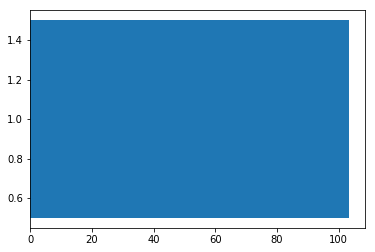

In [47]:
plt.barh(1,ds4['scaled_weekday_index'].nlargest(10),height=1)

In [48]:
ds4['scaled_weekday_index'].nlargest(10)

463    103.320034
218     32.369191
110      5.153242
284      4.213445
323      4.162329
384      3.827704
354      3.450137
214      3.435871
132      3.370630
302      3.346143
Name: scaled_weekday_index, dtype: float64

In [49]:
for i in ds4['scaled_weekday_index'].nlargest(10):
    print(i)

103.32003410059676
32.369190509420804
5.153242337883105
4.213444776119403
4.162328595793064
3.8277044996162566
3.4501365473310015
3.435870760585993
3.370629618158488
3.346143036229718


In [50]:
large_weekday = ds4.isin(ds4['scaled_weekday_index'].nlargest(10))

In [51]:
large_weekday

,stl,idx,weekly_traffic,scaled_weekday_index
0,False,False,False,False
2,False,False,False,False
4,False,False,False,False
12,False,False,False,False
17,False,False,False,False
18,False,False,False,False
19,False,False,False,False
20,False,False,False,False
22,False,False,False,False
24,False,False,False,False


In [52]:
ds5 = ds4.sort_values(by = 'scaled_weekday_index',ascending=False)[:10]

In [53]:
ds3[ds3['stl']=='BROADWAY JCT ACJLZ']

,stl,idx,weekly_traffic,scaled_weekday_index
224,BROADWAY JCT ACJLZ,3.358213,75276.8,1.343285


[Text(0,0.5,'Stations'),
 Text(0.5,0,'Weekly Entries'),
 Text(0.5,1,'Stations with at least 3x ridership on Weekdays')]

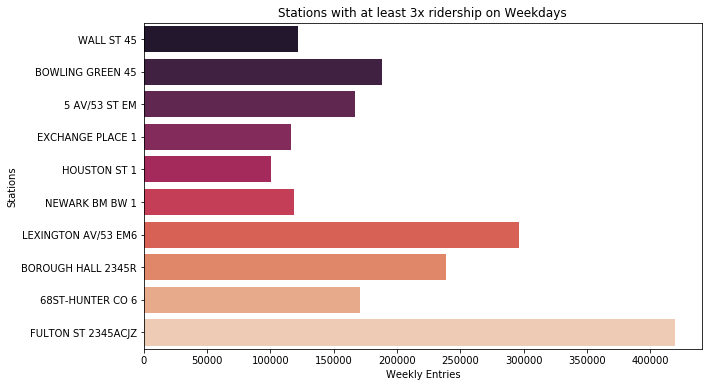

In [54]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,6))

stations = ds5.stl
y_pos = np.arange(len(stations))
traffic = ds5.weekly_traffic


ax = sns.barplot(traffic,stations,palette='rocket')
ax.set(ylabel = 'Stations',

xlabel=('Weekly Entries'),
title=('Stations with at least 3x ridership on Weekdays'))

In [55]:
ds6 = ds4.sort_values(by = 'scaled_weekday_index',ascending=True)[:10]

In [56]:
ttst=sub[sub['stl'] == '23 ST 6'].set_index(['datetime'])

In [57]:
sub['time'] = sub['datetime'].dt.time

In [58]:
resample_ttst = ttst['hr4'].resample('4H',label='left').sum().reset_index()

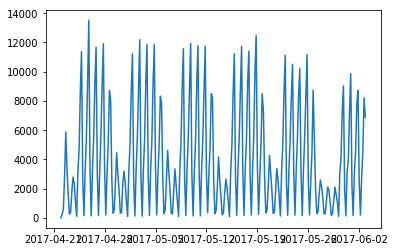

In [59]:
plt.plot(resample_ttst['datetime'],resample_ttst['hr4'])

In [60]:
resample_ttst['time'] = resample_ttst['datetime'].dt.hour

In [61]:
resample_ttst['weekday'] = resample_ttst['datetime'].dt.weekday

In [62]:
resample_ttst['bday'] = resample_ttst['weekday'].apply(is_weekday)

In [63]:
n = resample_ttst.groupby(['weekday','time'])['hr4'].mean().reset_index()

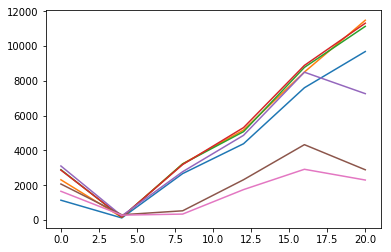

In [64]:
for i in range(7):
    plt.plot(n[n['weekday']==i]['time'],n[n['weekday']==i]['hr4'])

[Text(0,0.5,'Stations'),
 Text(0.5,0,'Weekly Entries'),
 Text(0.5,1,'Stations with at least 3x ridership on Weekdays')]

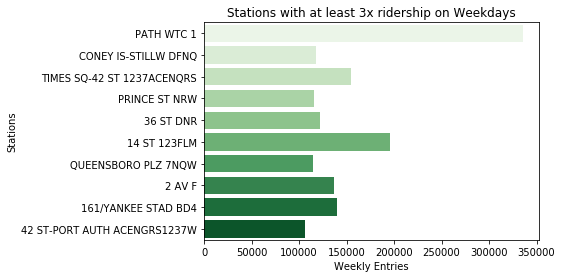

In [65]:

fig,ax = plt.subplots()

stations = ds6.stl
y_pos = np.arange(len(stations))
traffic = ds6.weekly_traffic


ax = sns.barplot(traffic,stations,palette='Greens')
ax.set(ylabel = 'Stations',

xlabel=('Weekly Entries'),
title=('Stations with at least 3x ridership on Weekdays'))

In [66]:
sub

,Unnamed: 0,c/a,unit,scp,station,linename,division,datetime,hr4,weekday,stl,time
0,0,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 00:00:00,NaN,5,1 AV L,00:00:00
1,1,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 04:00:00,97.0,5,1 AV L,04:00:00
2,2,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 08:00:00,105.0,5,1 AV L,08:00:00
3,3,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 12:00:00,541.0,5,1 AV L,12:00:00
4,4,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 16:00:00,818.0,5,1 AV L,16:00:00
5,5,H007,R248,00-00-00,1 AV,L,BMT,2017-04-22 20:00:00,711.0,5,1 AV L,20:00:00
6,6,H007,R248,00-00-00,1 AV,L,BMT,2017-04-23 00:00:00,514.0,6,1 AV L,00:00:00
7,7,H007,R248,00-00-00,1 AV,L,BMT,2017-04-23 04:00:00,113.0,6,1 AV L,04:00:00
8,8,H007,R248,00-00-00,1 AV,L,BMT,2017-04-23 08:00:00,66.0,6,1 AV L,08:00:00
9,9,H007,R248,00-00-00,1 AV,L,BMT,2017-04-23 12:00:00,398.0,6,1 AV L,12:00:00


In [67]:
ds5.reset_index()

,index,stl,idx,weekly_traffic,scaled_weekday_index
0,463,WALL ST 45,258.300085,121663.6,103.320034
1,218,BOWLING GREEN 45,80.922976,187833.0,32.369191
2,110,5 AV/53 ST EM,12.883106,166605.6,5.153242
3,284,EXCHANGE PLACE 1,10.533612,115912.8,4.213445
4,323,HOUSTON ST 1,10.405821,100314.2,4.162329
5,384,NEWARK BM BW 1,9.569261,118432.8,3.827704
6,354,LEXINGTON AV/53 EM6,8.625341,296766.6,3.450137
7,214,BOROUGH HALL 2345R,8.589677,238926.8,3.435871
8,132,68ST-HUNTER CO 6,8.426574,170440.0,3.370630
9,302,FULTON ST 2345ACJZ,8.365358,419854.6,3.346143


In [68]:
loc[loc['NAME'].str.contains('World')]

,OBJECTID,NAME,the_geom,LINE,newline
408,409,World Trade Center,POINT (-74.00974461517701 40.71256392680817),E,E


In [94]:
ds5.drop([0], inplace=True)

In [91]:
ds5.at[463,'scaled_weekday_index'] = 10
ds5.at[218,'scaled_weekday_index'] = 8

In [69]:
l = ['POINT (-74.00909999844257 40.706820999753376)','POINT (-73.9752485052734 40.76008683231326)','POINT (-73.99276500471389 40.742954317826005)','POINT (-74.00858473570133 40.714111000774025)','POINT (-73.98133100227702 40.75864100159815)','POINT (-74.00926600170112 40.71547800011327)','POINT (-73.96387000158042 40.76814100049679)','POINT (-74.00974461517701 40.71256392680817)','POINT (-73.98659900207888 40.739864000474604)','POINT (-74.01400799803432 40.70491399928076)']

In [70]:
m = np.asarray(l)

In [71]:
len(m)

10

In [86]:
l = ['POINT (-74.00909999844257 40.706820999753376)','POINT (-73.9752485052734 40.76008683231326)','POINT (-73.99276500471389 40.742954317826005)','POINT (-74.00858473570133 40.714111000774025)','POINT (-73.98133100227702 40.75864100159815)','POINT (-74.00926600170112 40.71547800011327)','POINT (-73.96387000158042 40.76814100049679)','POINT (-74.00974461517701 40.71256392680817)','POINT (-73.98659900207888 40.739864000474604)','POINT (-74.01400799803432 40.70491399928076)']
m = np.asarray(l)
ds5['loc'] = m

ds5['lon'] = ds5['loc'].apply(lambda x: float( x.split(' ')[1][1:]))
ds5['lat'] = ds5['loc'].apply(lambda x: float( x.split(' ')[2][:-1]))
ds5.drop(['loc'],axis=1,inplace=True)
ds5


ValueError: Length of values does not match length of index

In [97]:
import mplleaflet
plt.scatter(x=ds5['lon'],y=ds5['lat'],s=(ds5['scaled_weekday_index']/3)**2*150,c='green')
mplleaflet.show(tiles='esri_natgeo')


In [98]:
ds5

,stl,idx,weekly_traffic,scaled_weekday_index,lon,lat
463,WALL ST 45,258.300085,121663.6,10.000000,-74.009100,40.706821
218,BOWLING GREEN 45,80.922976,187833.0,8.000000,-73.975249,40.760087
110,5 AV/53 ST EM,12.883106,166605.6,5.153242,-73.992765,40.742954
284,EXCHANGE PLACE 1,10.533612,115912.8,4.213445,-74.008585,40.714111
323,HOUSTON ST 1,10.405821,100314.2,4.162329,-73.981331,40.758641
384,NEWARK BM BW 1,9.569261,118432.8,3.827704,-74.009266,40.715478
354,LEXINGTON AV/53 EM6,8.625341,296766.6,3.450137,-73.963870,40.768141
214,BOROUGH HALL 2345R,8.589677,238926.8,3.435871,-74.009745,40.712564
132,68ST-HUNTER CO 6,8.426574,170440.0,3.370630,-73.986599,40.739864
302,FULTON ST 2345ACJZ,8.365358,419854.6,3.346143,-74.014008,40.704914


In [432]:
float(d.split(' ')[2][:-1])

40.71256392680817

In [436]:
ds5['lat'] = ds5['loc'].apply(lambda x: x.split(' ')[1][1:])

KeyError: 'loc'

In [433]:
ds5['lon'] = ds5['loc'].apply(lambda x: x.split(' ')[2][:-1])

In [434]:
ds5.drop(['loc'],axis=1,inplace=True)

In [435]:
ds5

,stl,idx,weekly_traffic,scaled_weekday_index,lat,lon
459,WALL ST 23,125.544063,122342.8,5.000000,74.00909999844257,40.706820999753376
108,5 AV/53 ST EM,9.026138,143383.8,3.610455,73.9752485052734,40.76008683231326
74,23 ST FM,8.880399,165668.6,3.552160,73.99276500471389,40.742954317826005
242,CHAMBERS ST ACE23,8.836013,168256.8,3.534405,74.00858473570133,40.714111000774025
105,47-50 STS ROCK BDFM,8.568578,324321.2,3.427431,73.98133100227702,40.75864100159815
241,CHAMBERS ST 123,8.364797,116794.0,3.345919,74.00926600170112,40.71547800011327
131,68ST-HUNTER CO 6,8.346565,123195.2,3.338626,73.96387000158042,40.76814100049679
400,PATH NEW WTC 1,7.894038,304638.6,3.157615,74.00974461517701,40.71256392680817
72,23 ST 6,7.878508,156331.0,3.151403,73.98659900207888,40.739864000474604
217,BOWLING GREEN 45,7.454063,169329.8,2.981625,74.01400799803432,40.70491399928076


In [99]:
loc

,OBJECTID,NAME,the_geom,LINE,newline
0,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,46
1,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,46
2,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,12
3,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,234
4,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,34
5,6,238th St,POINT (-73.90087000018522 40.88466700064975),1,1
6,7,Cathedral Pkwy (110th St),POINT (-73.95806670661364 40.800581558114956),A-B-C,ABC
7,8,Kingston - Throop Aves,POINT (-73.94085899871263 40.67991899941601),A-C,AC
8,9,65th St,POINT (-73.8987883783301 40.74971952935675),E-M-R,EMR
9,10,36th St,POINT (-73.92901818461539 40.75196004401078),E-M-R,EMR
